In [1]:

# to print the no of rows and columns, print hte first and last 5 rows and stats of th enumericla columns 


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("apple_stock.csv")

print("Shape of dataset:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nFirst 5 rows:\n", df.head())
print("\nLast 5 rows:\n", df.tail())
print("\nData Types:\n", df.dtypes)
print("\nDataset Info:")
print(df.info())
print("\nSummary Stats (numeric columns):\n", df.describe())



Shape of dataset: (11107, 7)

Columns: ['Unnamed: 0', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']

First 5 rows:
    Unnamed: 0  Adj Close     Close      High       Low      Open     Volume
0  1980-12-12   0.098834  0.128348  0.128906  0.128348  0.128348  469033600
1  1980-12-15   0.093678  0.121652  0.122210  0.121652  0.122210  175884800
2  1980-12-16   0.086802  0.112723  0.113281  0.112723  0.113281  105728000
3  1980-12-17   0.088951  0.115513  0.116071  0.115513  0.115513   86441600
4  1980-12-18   0.091530  0.118862  0.119420  0.118862  0.118862   73449600

Last 5 rows:
        Unnamed: 0   Adj Close       Close        High         Low        Open  \
11102  2024-12-27  255.589996  255.589996  258.700012  253.059998  257.829987   
11103  2024-12-30  252.199997  252.199997  253.500000  250.750000  252.229996   
11104  2024-12-31  250.419998  250.419998  253.279999  249.429993  252.440002   
11105  2025-01-02  243.850006  243.850006  249.100006  241.820007  248.929993   

In [10]:
#Handling Missing Values
print("\nMissing values count per column:\n", df.isnull().sum())



Missing values count per column:
 Unnamed: 0    0
Adj Close     0
Close         0
High          0
Low           0
Open          0
Volume        0
dtype: int64


In [11]:
# Remove rows with missing values
df = df.dropna()
print("\nShape after dropping missing values:", df.shape)


Shape after dropping missing values: (11107, 7)


In [12]:
#Add a new feature "total" if numeric columns exist
num_cols = df.select_dtypes(include=np.number).columns
if len(num_cols) >= 2:
    df["new_feature_sum"] = df[num_cols[0]] + df[num_cols[1]]
    print(f"\nNew feature 'new_feature_sum' added using {num_cols[0]} + {num_cols[1]}")



New feature 'new_feature_sum' added using Adj Close + Close


In [15]:
# 6. Load Dataset using NumPy
data_np = df.to_numpy()
print("\nDataset loaded into NumPy array with shape:", data_np.shape)
print("Data type of array:", data_np.dtype)



Dataset loaded into NumPy array with shape: (11107, 8)
Data type of array: object


In [14]:

# Handling missing values in NumPy (if any remain)
data_np = np.nan_to_num(data_np)


In [16]:
# 7. Remove Duplicates
df = df.drop_duplicates()
print("\nShape after removing duplicates:", df.shape)



Shape after removing duplicates: (11107, 8)


In [18]:
# 8. Normalize / Scale Numerical Features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = df.copy()

num_cols = df_scaled.select_dtypes(include=np.number).columns
df_scaled[num_cols] = scaler.fit_transform(df_scaled[num_cols])

print("\nFirst 5 rows after scaling:\n", df_scaled.head())



First 5 rows after scaling:
    Unnamed: 0  Adj Close     Close      High       Low      Open    Volume  \
0  1980-12-12  -0.470674 -0.482508 -0.482727 -0.482369 -0.482626  0.458700   
1  1980-12-15  -0.470778 -0.482641 -0.482859 -0.482503 -0.482748 -0.416741   
2  1980-12-16  -0.470916 -0.482819 -0.483036 -0.482683 -0.482926 -0.626253   
3  1980-12-17  -0.470873 -0.482764 -0.482980 -0.482627 -0.482882 -0.683849   
4  1980-12-18  -0.470821 -0.482697 -0.482914 -0.482559 -0.482815 -0.722647   

   new_feature_sum  
0        -0.476640  
1        -0.476758  
2        -0.476916  
3        -0.476867  
4        -0.476808  


In [19]:
# 9. Train-Test Split

X = df_scaled.iloc[:, :-1]
y = df_scaled.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nTrain set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Train set shape: (8885, 7) (8885,)
Test set shape: (2222, 7) (2222,)


In [20]:
print(" Summary Statistics")
print(df.describe()) 

 Summary Statistics
          Adj Close         Close          High           Low          Open  \
count  11107.000000  11107.000000  11107.000000  11107.000000  11107.000000   
mean      23.522229     24.357607     24.598169     24.092608     24.339076   
std       49.767881     50.217498     50.691902     49.682631     50.166818   
min        0.037815      0.049107      0.049665      0.049107      0.049665   
25%        0.243402      0.300290      0.306362      0.292411      0.300090   
50%        0.446682      0.542411      0.553393      0.534598      0.542679   
75%       18.260086     21.397143     21.569285     21.115715     21.367679   
max      259.019989    259.019989    260.100006    257.630005    258.190002   

             Volume  new_feature_sum  
count  1.110700e+04     11107.000000  
mean   3.154341e+08        47.879836  
std    3.348735e+08        99.980769  
min    0.000000e+00         0.086922  
25%    1.111164e+08         0.544526  
50%    2.036944e+08         0.9886

In [21]:
print("\nMedian values:\n", df.median(numeric_only=True))



Median values:
 Adj Close          4.466817e-01
Close              5.424110e-01
High               5.533930e-01
Low                5.345980e-01
Open               5.426790e-01
Volume             2.036944e+08
new_feature_sum    9.886428e-01
dtype: float64


In [22]:
print("\n--- Correlation Matrix ---")
corr_matrix = df.corr(numeric_only=True)
print(corr_matrix)


--- Correlation Matrix ---
                 Adj Close     Close      High       Low      Open    Volume  \
Adj Close         1.000000  0.999816  0.999752  0.999767  0.999694 -0.265350   
Close             0.999816  1.000000  0.999946  0.999946  0.999884 -0.264132   
High              0.999752  0.999946  1.000000  0.999929  0.999947 -0.263705   
Low               0.999767  0.999946  0.999929  1.000000  0.999945 -0.264549   
Open              0.999694  0.999884  0.999947  0.999945  1.000000 -0.264034   
Volume           -0.265350 -0.264132 -0.263705 -0.264549 -0.264034  1.000000   
new_feature_sum   0.999953  0.999954  0.999896  0.999903  0.999836 -0.264750   

                 new_feature_sum  
Adj Close               0.999953  
Close                   0.999954  
High                    0.999896  
Low                     0.999903  
Open                    0.999836  
Volume                 -0.264750  
new_feature_sum         1.000000  


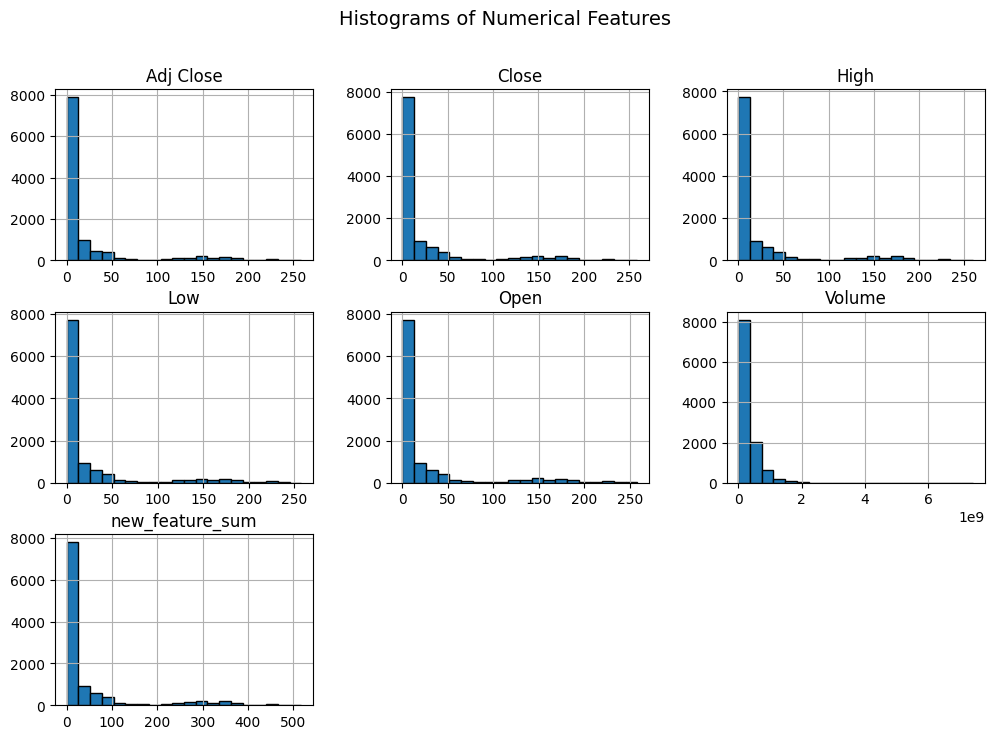

In [23]:
df.hist(figsize=(12, 8), bins=20, edgecolor="black")
plt.suptitle("Histograms of Numerical Features", fontsize=14)
plt.show()

In [25]:
df.columns

Index(['Unnamed: 0', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume',
       'new_feature_sum'],
      dtype='object')

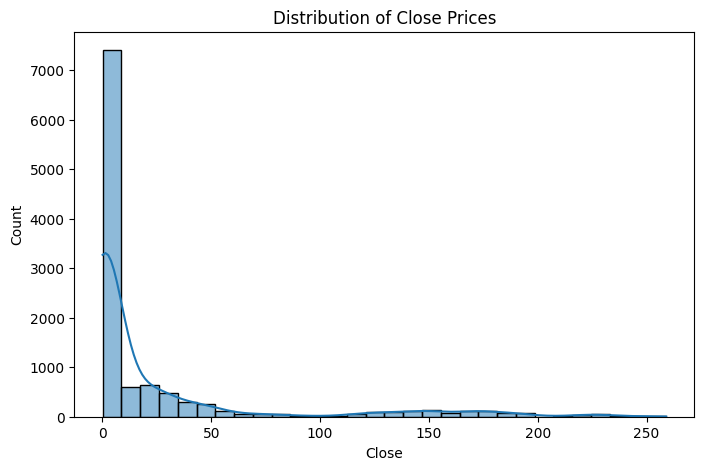

In [26]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Close'], bins=30, kde=True)
plt.title("Distribution of Close Prices")
plt.show()


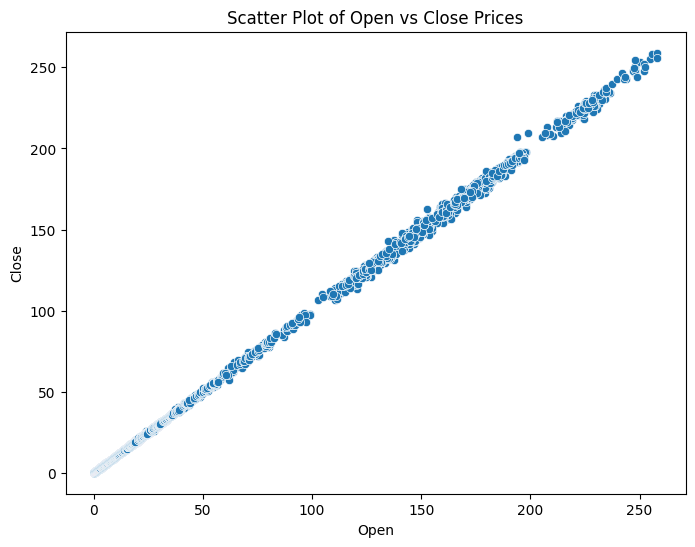

In [27]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Open', y='Close', data=df)
plt.title("Scatter Plot of Open vs Close Prices")
plt.show()


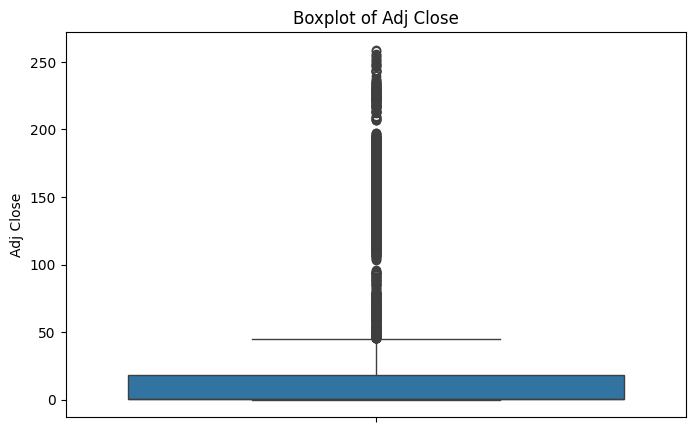

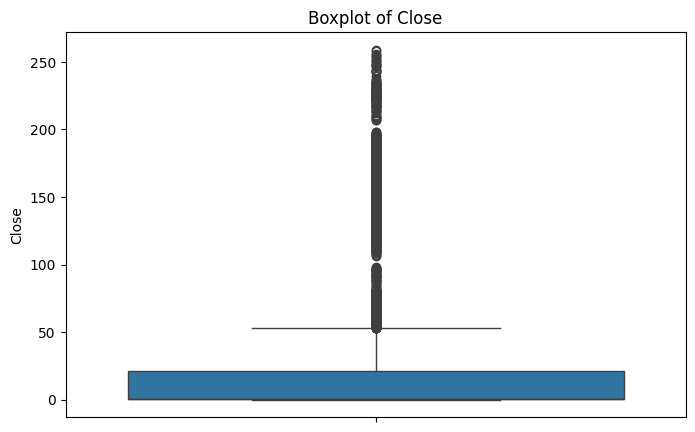

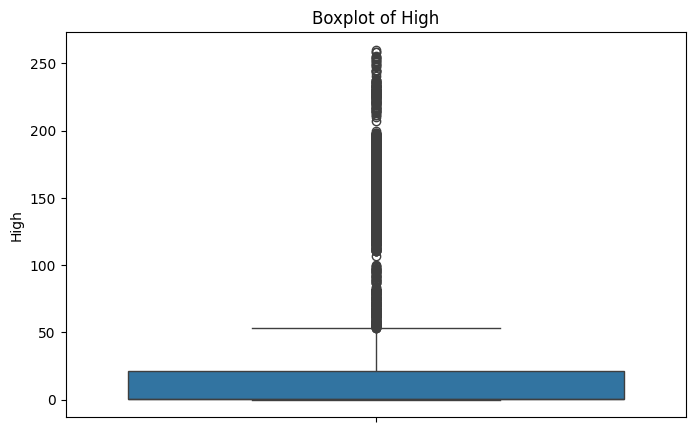

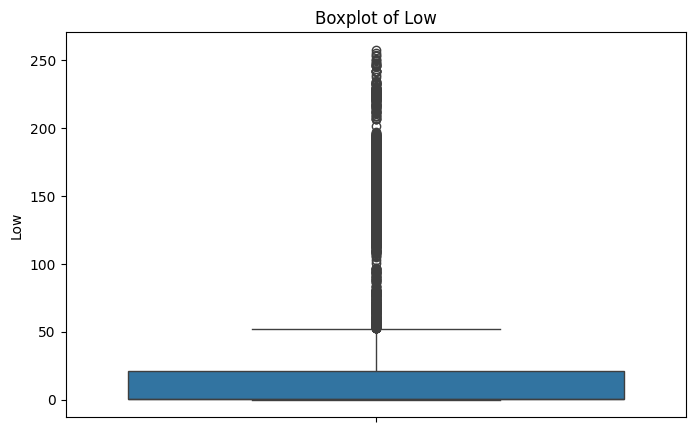

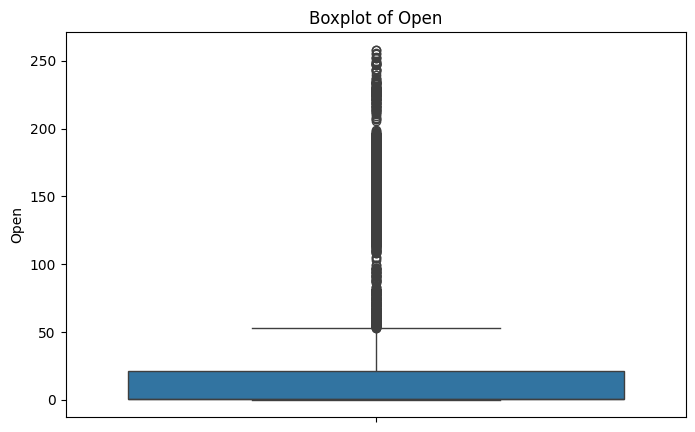

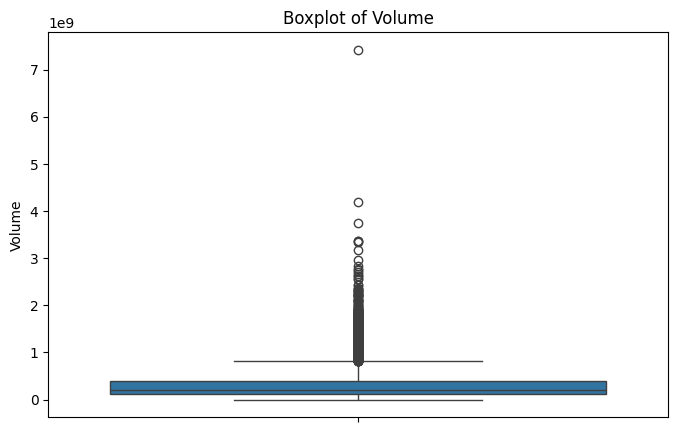

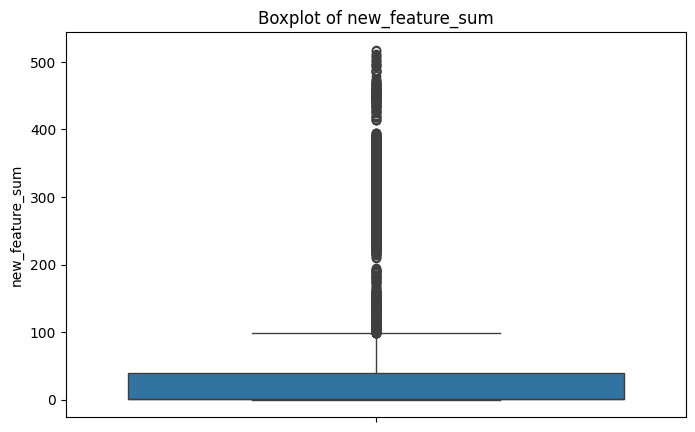

In [28]:
numeric_cols = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume', 'new_feature_sum']

for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


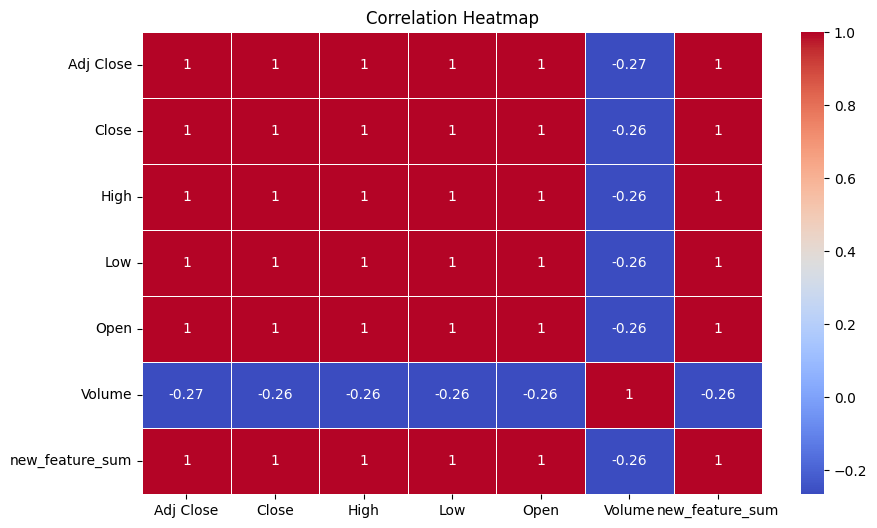

In [29]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [31]:
from sklearn import datasets
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler



In [36]:

#  to perform Sklearn Operations on apple_stock.csv

import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

# 1. Load dataset
apple_data = pd.read_csv("apple_stock.csv")
print("Original Data:")
print(apple_data.head())
print("\nColumn Types:")
print(apple_data.dtypes)

# 2. Replace Null Values

# Separate numeric and categorical columns
numeric_cols = apple_data.select_dtypes(include=['number']).columns
categorical_cols = apple_data.select_dtypes(exclude=['number']).columns

# Impute numeric columns with mean
num_imputer = SimpleImputer(strategy='mean')
apple_data[numeric_cols] = num_imputer.fit_transform(apple_data[numeric_cols])

# Impute categorical columns with most frequent (if any exist)
if len(categorical_cols) > 0:
    cat_imputer = SimpleImputer(strategy='most_frequent')
    apple_data[categorical_cols] = cat_imputer.fit_transform(apple_data[categorical_cols])

print("\nAfter Imputation:")
print(apple_data.head())


# 3. Apply Label Encoding & One Hot Encoding

# Label Encoding for categorical columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    apple_data[col + "_label_encoded"] = label_encoder.fit_transform(apple_data[col])

# One Hot Encoding for categorical columns
ohe = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' to avoid dummy trap
if len(categorical_cols) > 0:
    cat_onehot = ohe.fit_transform(apple_data[categorical_cols])
    cat_onehot_df = pd.DataFrame(cat_onehot, columns=ohe.get_feature_names_out(categorical_cols))
    apple_data = pd.concat([apple_data.reset_index(drop=True), cat_onehot_df], axis=1)

print("\nAfter Label & One-Hot Encoding:")
print(apple_data.head())


# 4. Apply Standard Scaler and MinMax Scaler

scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

# Apply scaling to numeric features only
data_standard_scaled = pd.DataFrame(scaler_standard.fit_transform(apple_data[numeric_cols]), 
                                    columns=[col+"_std" for col in numeric_cols])
data_minmax_scaled = pd.DataFrame(scaler_minmax.fit_transform(apple_data[numeric_cols]), 
                                  columns=[col+"_minmax" for col in numeric_cols])

# Concatenate scaled data back
apple_data = pd.concat([apple_data, data_standard_scaled, data_minmax_scaled], axis=1)

print("\nFinal Processed Data:")
print(apple_data.head())


Original Data:
   Unnamed: 0  Adj Close     Close      High       Low      Open     Volume
0  1980-12-12   0.098834  0.128348  0.128906  0.128348  0.128348  469033600
1  1980-12-15   0.093678  0.121652  0.122210  0.121652  0.122210  175884800
2  1980-12-16   0.086802  0.112723  0.113281  0.112723  0.113281  105728000
3  1980-12-17   0.088951  0.115513  0.116071  0.115513  0.115513   86441600
4  1980-12-18   0.091530  0.118862  0.119420  0.118862  0.118862   73449600

Column Types:
Unnamed: 0     object
Adj Close     float64
Close         float64
High          float64
Low           float64
Open          float64
Volume          int64
dtype: object

After Imputation:
   Unnamed: 0  Adj Close     Close      High       Low      Open       Volume
0  1980-12-12   0.098834  0.128348  0.128906  0.128348  0.128348  469033600.0
1  1980-12-15   0.093678  0.121652  0.122210  0.121652  0.122210  175884800.0
2  1980-12-16   0.086802  0.112723  0.113281  0.112723  0.113281  105728000.0
3  1980-12-17  

In [39]:
#basic ml algorithms 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score

apple_data = pd.read_csv("apple_stock.csv")


apple_data["UpDown"] = (apple_data["Close"] > apple_data["Open"]).astype(int)


regression_target = "Close"
classification_target = "UpDown"


X = apple_data.select_dtypes(include=['number']).drop([regression_target, classification_target], axis=1, errors='ignore')
y_class = apple_data[classification_target]
y_reg = apple_data[regression_target]

# 5. Train-Test Split
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_class, test_size=0.2, random_state=42)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y_reg, test_size=0.2, random_state=42)


# Classification Models

# Logistic Regression
log_clf = LogisticRegression(max_iter=1000)
log_clf.fit(X_train_c, y_train_c)
y_pred_log = log_clf.predict(X_test_c)
print("\nLogistic Regression Accuracy:", accuracy_score(y_test_c, y_pred_log))

# Decision Tree
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train_c, y_train_c)
y_pred_tree = tree_clf.predict(X_test_c)
print("Decision Tree Accuracy:", accuracy_score(y_test_c, y_pred_tree))

# KNN
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train_c, y_train_c)
y_pred_knn = knn_clf.predict(X_test_c)
print("KNN Accuracy:", accuracy_score(y_test_c, y_pred_knn))

print("\nClassification Report")



Logistic Regression Accuracy: 0.5508550855085509
Decision Tree Accuracy: 0.7245724572457246
KNN Accuracy: 0.5184518451845185

Classification Report



Classification Metrics (Decision Tree):
Accuracy : 0.7245724572457246
Precision: 0.6895874263261297
Recall   : 0.7034068136272545
F1-Score : 0.6964285714285714

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.74      0.75      1224
           1       0.69      0.70      0.70       998

    accuracy                           0.72      2222
   macro avg       0.72      0.72      0.72      2222
weighted avg       0.73      0.72      0.72      2222



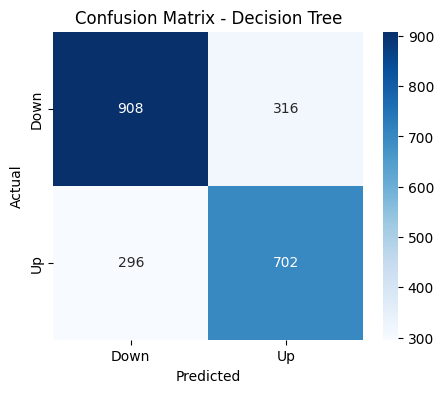


Regression Metrics (Linear Regression):
RMSE: 0.30678086617570055
MAE : 0.1547956926718309
R²  : 0.9999612126335351


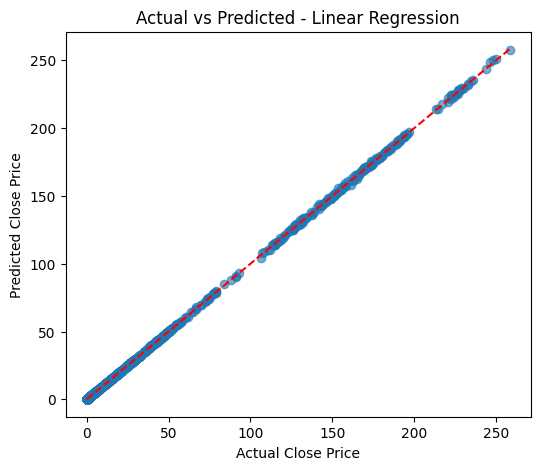

In [40]:

# Model Evaluation 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    mean_squared_error, mean_absolute_error, r2_score,
    classification_report, confusion_matrix
)

# 2. Create Classification Target (Up/Down: 1 if Close > Open else 0)
apple_data["UpDown"] = (apple_data["Close"] > apple_data["Open"]).astype(int)

# 3. Define Targets
regression_target = "Close"
classification_target = "UpDown"

# 4. Select only numeric features for ML
X = apple_data.select_dtypes(include=['number']).drop([regression_target, classification_target], axis=1, errors='ignore')
y_class = apple_data[classification_target]
y_reg = apple_data[regression_target]

# 5. Train-Test Split
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_class, test_size=0.2, random_state=42)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y_reg, test_size=0.2, random_state=42)

# Classification Models (example: Decision Tree)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_c, y_train_c)
y_pred_c = clf.predict(X_test_c)

# Classification Evaluation
accuracy = accuracy_score(y_test_c, y_pred_c)
precision = precision_score(y_test_c, y_pred_c)
recall = recall_score(y_test_c, y_pred_c)
f1 = f1_score(y_test_c, y_pred_c)

print("\nClassification Metrics (Decision Tree):")
print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1-Score :", f1)

print("\nClassification Report:\n", classification_report(y_test_c, y_pred_c))

# Confusion Matrix
cm = confusion_matrix(y_test_c, y_pred_c)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Down", "Up"], yticklabels=["Down", "Up"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

# ============================
# Regression Model (Linear Regression)
# ============================
reg = LinearRegression()
reg.fit(X_train_r, y_train_r)
y_pred_r = reg.predict(X_test_r)

# Regression Evaluation
mse = mean_squared_error(y_test_r, y_pred_r)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_r, y_pred_r)
r2 = r2_score(y_test_r, y_pred_r)

print("\nRegression Metrics (Linear Regression):")
print("RMSE:", rmse)
print("MAE :", mae)
print("R²  :", r2)

# Plot Actual vs Predicted
plt.figure(figsize=(6,5))
plt.scatter(y_test_r, y_pred_r, alpha=0.6)
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Actual vs Predicted - Linear Regression")
plt.plot([y_test_r.min(), y_test_r.max()], [y_test_r.min(), y_test_r.max()], 'r--')  # 45-degree line
plt.show()


In [ ]:
# apple stock shows strong correlation between opening , high.low and closing proces. regression models like th elinear regression achieved low RSME/MAE 
#indicating good predictuve performance for stock prices . classification models were less effective withiout creating custom target labels , but decusion tree and KNN still showed resonable accuracy 